# Life Expectancy and GDP

Problem: Is there a connection between life expectancy and a nation's GDP?
 
| Goals        | Goal Type    | Constraints  |
| ------------ | ------------ | ------------ |
| Find countries with lowest life expectancy | efficiency | provide funding to improve life expectancy in lowest areas |
| Find countries with lowest and highest GDP | equity | can't force nations to help others |
| Find any correlation between life expectancy and GDP | equity | provide a better understanding for the links in order to provide proof and garner support |

### Step 1
First we need to impor the libraries that we are going to utilize during the project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`


In [58]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

### Step 2
Next we need to import our dataset utilizing pandas

In [59]:
df = pd.read_csv('all_data.csv')

### Step 3
Some intial data exploration is in order. First will get basic information using <code>df.info()</code>

In [60]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


We know how many rows there, the datatype for each, along with the possibility of any null items. The dataframe has 4 columns with 96 entries.

Next, we can see what each of the datatypes looks like and explore into each of the individual columns a little more:

In [61]:
print(df.head())
print(df.Country.unique())
print(df.Year.unique())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


So, there are 6 different countries, with information spanning a 15 year period (from 2000 to 2015). The six countries span across several different continents: South America (Chile), North America (Mexico and the United States), Africa (Zimbabwe), Europe (Germany), and Asia (China). It's important to note that these countries vary in sizes and populations.

In [62]:
print(df['Life expectancy at birth (years)'].describe())
print(df.GDP.describe())

count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life expectancy at birth (years), dtype: float64
count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64


- Life expectancy goes from 44.3 to 81, with a mean of 72.78 and median of 76.75. The full title of the column is `Life expectancy at birth (years)` which may be different to work with so we might want to change it to something shorter.
- GDP goes from 4.4e9 to 1.81e13, with a mean of 3.88e12 and median of 1.28e12. The column data is in scientific notation, the min value is 4.4 billion while the max value is 18.1 trillion. In order to be easier to read, we'll want to convert the values to either read as parts of billions or trillions. The 18.1 trillion however is going to be a very large value as compared to 4.4 billion which may make any observation difficult to read.

### Step 4
Clean up data. 

We're going to rename the Life expectancy column to `Lifespan`. We're then going to divide each GDP value by 100 billion to make it more readable.

In [63]:
df = df.rename(columns={'Life expectancy at birth (years)': 'Lifespan'})
df.GDP = df.GDP / 100000000000
print(df.describe())

              Year   Lifespan         GDP
count    96.000000  96.000000   96.000000
mean   2007.500000  72.789583   38.804986
std       4.633971  10.672882   51.975613
min    2000.000000  44.300000    0.044157
25%    2003.750000  74.475000    1.733017
50%    2007.500000  76.750000   12.802200
75%    2011.250000  78.900000   40.675100
max    2015.000000  81.000000  181.000000


### Step 5 

Now it's time to make some initial views of the data. We'll look at each countries lifespans and their GDPs in different charts.

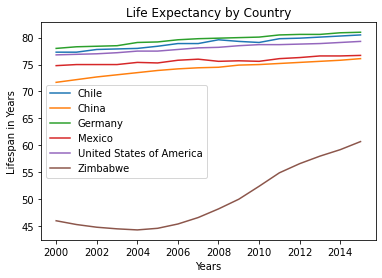

In [64]:
for country in df.Country.unique():
  plt.plot(df.Year.unique(), df[df.Country == country].Lifespan)
plt.title('Life Expectancy by Country')
plt.legend(df.Country.unique())
plt.ylabel('Lifespan in Years')
plt.xlabel('Years')
plt.show()

It looks like all the countries life expectancy has increased during the time period covered. Zimbabwe has the most dramatic increase, with a low around 44 in 2004 up to almost 60 10 years later. When looking at the history of Zimbabwe, it appears that a change of government policies in the late 90s cause an economic collapse in the early 2000s. Based on farm seizures and election tampering they recieved many international sanctions. It's estimated that almost 2 million people died during that period and that the population should be around 31 million (if it tracked at the same rate as its neighbors) and instead today it's around 13 million. This has the potential for skewing the data.

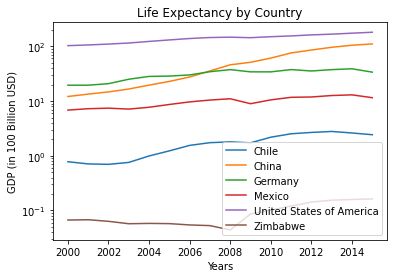

In [65]:
for country in df.Country.unique():
  plt.plot(df.Year.unique(), df[df.Country == country].GDP)
plt.title('Life Expectancy by Country')
plt.legend(df.Country.unique())
plt.ylabel('GDP (in 100 Billion USD)')
plt.xlabel('Years')
plt.yscale('log')
plt.show()